**Discrete Fourier Series Examples Notebook**

N. Stergioulas

Aristotle University of Thessaloniki

v1.0 (May 2019)

###### Content provided under a Creative Commons Attribution license, [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/); code under [GNU GPLv3 License](https://choosealicense.com/licenses/gpl-3.0/). (c)2018 [Nikolaos Stergioulas](http://www.astro.auth.gr/~niksterg/)



In [1]:
import numpy as np
from scipy import fftpack 
import matplotlib.pyplot as plt
import random

### Fourier Transform

The Fourier transform of a function $g(t)$ is given by 
$$G(f)=\int_{-\infty}^{\infty} g(t) e^{-i 2 \pi f t} d t$$
The discrete Fourier transform (DFT) is defined for a function $g_n$ consisting of a set of $N$ discrete data points. Those $N$ data points must be defined at equally-spaced times $t_n = n\Delta t$ where $\Delta t$ is the time between successive data points and $n$ runs from 0 to $N − 1$. The discrete Fourier transform (DFT) of $g_n$ is defined as
$$G_{l}=\sum_{n=0}^{N-1} g_{n} e^{-i(2 \pi / N) l n}$$
where $l$ runs from 0 to $N-1$.

### Example 1: Single frequency with finite duration

In [19]:
width = 2.0
freq = 0.5
t = np.linspace(-10, 10, 101) # linearly space time array 
g = np.sin(2.0*np.pi*freq*t)
dt = t[1]-t[0] # increment between times in time array
G = fftpack.fft(g) # FFT of g
f = fftpack.fftfreq(g.size, d=dt) # frequenies f[i] of g[i]
f = fftpack.fftshift(f) # shift frequencies from min to max 
G = fftpack.fftshift(G) # shift G order to coorespond to f
A = np.sqrt(np.real(G)**2+np.imag(G)**2)
phase = np.arctan(np.imag(G)/np.real(G)) # phase

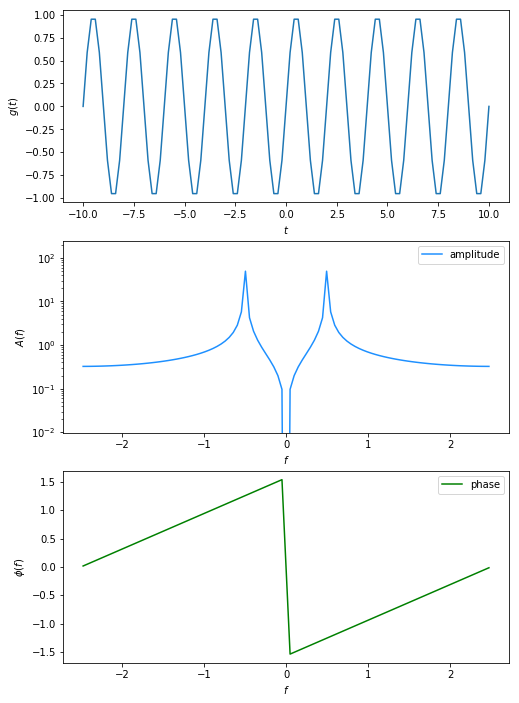

In [20]:
fig = plt.figure(1, figsize=(8,12), frameon=False)
ax1 = fig.add_subplot(311)
ax1.plot(t, g)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$g(t)$')
ax2 = fig.add_subplot(312)
ax2.plot(f, A, color='dodgerblue', label='amplitude')
ax2.set_yscale("log", nonposy='clip')
ax2.set_ylim(np.max(A)/5000,5*np.max(A))
ax2.legend()
ax2.set_xlabel('$f$')
ax2.set_ylabel('$A(f)$')
ax3 = fig.add_subplot(313)
ax3.plot(f, phase, color='green', label='phase')
ax3.legend()
ax3.set_xlabel('$f$')
ax3.set_ylabel('$\phi(f)$')
plt.show()

### Example 2: Damped single frequency

In [21]:
width = 2.0
freq = 0.5
t = np.linspace(-10, 10, 101) # create linearly space time array 
g = np.exp(-np.abs(t)/width) * np.sin(2.0*np.pi*freq*t) # signal
dt = t[1]-t[0] # increment between times in time array
G = fftpack.fft(g) # FFT of g
f = fftpack.fftfreq(g.size, d=dt) # frequenies f[i] of g[i]
f = fftpack.fftshift(f) # shift frequencies from min to max 
G = fftpack.fftshift(G) # shift G order to coorespond to f
A = np.sqrt(np.real(G)**2+np.imag(G)**2) # amplitude
phase = np.arctan(np.imag(G)/np.real(G)) # phase

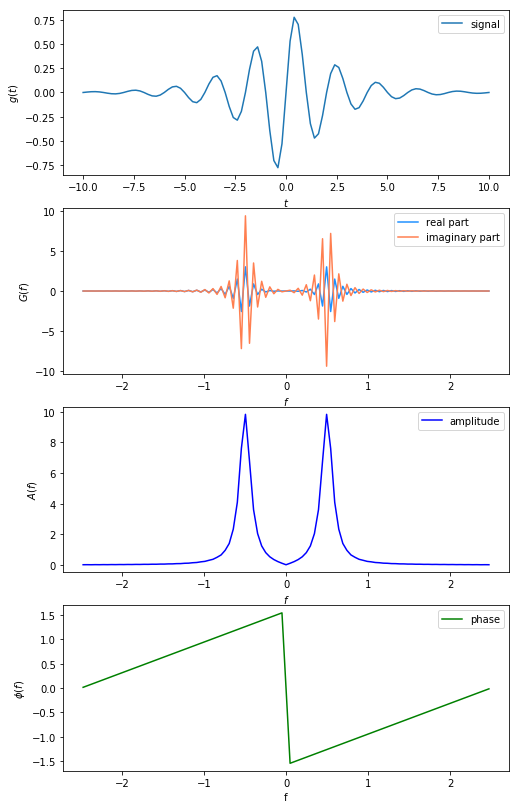

In [22]:
fig = plt.figure(1, figsize=(8,14), frameon=False)
ax1 = fig.add_subplot(411)
ax1.plot(t, g, label='signal')
ax1.legend()
ax1.set_xlabel('$t$')
ax1.set_ylabel('$g(t)$')
ax2 = fig.add_subplot(412)
ax2.plot(f, np.real(G), color='dodgerblue', label='real part')
ax2.plot(f, np.imag(G), color='coral', label='imaginary part')
ax2.legend()
ax2.set_xlabel('$f$')
ax2.set_ylabel('$G(f)$')
ax3 = fig.add_subplot(413)
ax3.plot(f, A, color='blue', label='amplitude')
ax3.legend()
ax3.set_xlabel('$f$')
ax3.set_ylabel('$A(f)$')
ax3 = fig.add_subplot(414)
ax3.plot(f, phase, color='green', label='phase')
ax3.legend()
ax3.set_xlabel('f')
ax3.set_ylabel('$\phi(f)$')
plt.show()

### Example 3: Three frequencies with noise

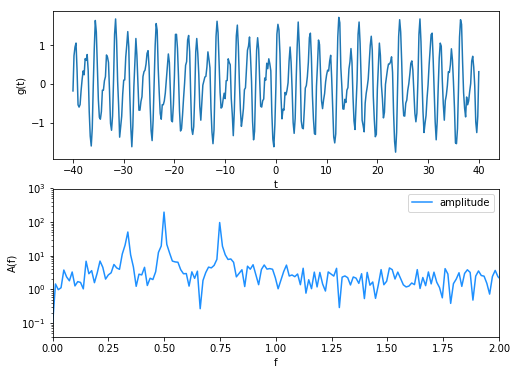

In [23]:
width = 2.0
freq = 0.5
t = np.linspace(-40, 40, 401) # linearly space time array 
g = np.sin(2.0*np.pi*freq*t) + 0.5*np.sin(2.0*np.pi*1.5*freq*t)+ 0.3*np.sin(2.0*np.pi*freq/1.5*t)
for i in range(0,401): # add noise
    g[i] += 0.02*random.randint(-10,10)
dt = t[1]-t[0] # increment between times in time array
G = fftpack.fft(g) # FFT of g
f = fftpack.fftfreq(g.size, d=dt) # frequenies f[i] of g[i]
f = fftpack.fftshift(f) # shift frequencies from min to max 
G = fftpack.fftshift(G) # shift G order to coorespond to f
A = np.sqrt(np.real(G)**2+np.imag(G)**2)
fig = plt.figure(1, figsize=(8,6), frameon=False)
ax1 = fig.add_subplot(211)
ax1.plot(t, g)
ax1.set_xlabel('t')
ax1.set_ylabel('g(t)')
ax2 = fig.add_subplot(212)
ax2.plot(f, A, color='dodgerblue', label='amplitude')
ax2.set_yscale("log", nonposy='clip')
ax2.set_xlim(0,2)
ax2.set_ylim(np.max(A)/5000,5*np.max(A))
ax2.legend()
ax2.set_xlabel('f')
ax2.set_ylabel('A(f)')
plt.show()

Reference:

https://physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html#discrete-fast-fourier-transforms